In [1]:
# Import required dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn import tree

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

**Binary Classification Datasets**

* Customer churn ([dataset](https://static.bc-edx.com/ai/ail-v-1-0/m13/lesson_3/datasets/customer-churn.csv)) ([info](https://static.bc-edx.com/ai/ail-v-1-0/m13/lesson_3/datasets/customer-churn.names))

* Sports article objectivity ([dataset](https://static.bc-edx.com/ai/ail-v-1-0/m13/lesson_3/datasets/sports-articles.csv)) ([info](https://static.bc-edx.com/ai/ail-v-1-0/m13/lesson_3/datasets/sports-articles.names))

**Multiclass Classification Datasets**

* Letter recognition ([dataset](https://static.bc-edx.com/ai/ail-v-1-0/m13/lesson_3/datasets/letter-recognition.csv)) ([info](https://static.bc-edx.com/ai/ail-v-1-0/m13/lesson_3/datasets/letter-recognition.names))

* Website phishing ([dataset](https://static.bc-edx.com/ai/ail-v-1-0/m13/lesson_3/datasets/phishing.csv)) ([info](https://static.bc-edx.com/ai/ail-v-1-0/m13/lesson_3/datasets/phishing.names))

* Orthopedic patients (normal, disk hernia or spondylolisthesis) ([dataset](https://static.bc-edx.com/ai/ail-v-1-0/m13/lesson_3/datasets/vertebral-column.csv)) ([info](https://static.bc-edx.com/ai/ail-v-1-0/m13/lesson_3/datasets/vertebral-column.names))


In [2]:
# Import data
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m13/lesson_3/datasets/letter-recognition.csv"
df = pd.read_csv(file_path)
df.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [31]:
# df.dtypes
df.info

<bound method DataFrame.info of        lettr  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  \
0         19      2      8      3     5      1      8     13      0      6   
1          8      5     12      3     7      2     10      5      5      4   
2          3      4     11      6     8      6     10      6      2      6   
3         13      7     11      6     6      3      5      9      4      6   
4          6      2      1      3     1      1      8      6      6      6   
...      ...    ...    ...    ...   ...    ...    ...    ...    ...    ...   
19995      3      2      2      3     3      2      7      7      7      6   
19996      2      7     10      8     8      4      4      8      6      9   
19997     19      6      9      6     7      5      6     11      3      7   
19998     18      2      3      4     2      1      8      7      2      6   
19999      0      4      9      6     6      2      9      5      3      1   

       xybar  x2ybr  xy2br  x-e

**Prepare Data**

In [4]:
# Define features set
# Drop the target to create the X data
X = df.copy()
X.drop("lettr", axis=1, inplace=True)
X.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [10]:

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
df['lettr'] = label_encoder.fit_transform(df['lettr'])

# choose the target vector
y=df["lettr"].values.reshape(-1, 1)

y[:5]

array([[19],
       [ 8],
       [ 3],
       [13],
       [ 6]])

In [32]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 500)

In [33]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)


In [34]:
# Transforming the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)


* Logistic regression
* Decision tree classifier
* Random forest classifier

In [35]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

**Model-Fit**

In [36]:
model = model.fit(X_train_scaled, y_train)

**Predict**

In [37]:
predictions = model.predict(X_test_scaled)
predictions

array([12, 23, 11, ...,  9, 10, 19])

**Evaluate**

In [38]:
acc_score = accuracy_score(y_test, predictions)

print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.8716


In [40]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt}')

Decision Tree Accuracy: 0.8782


In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')

/Users/jasoncampbell/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 0.9642


In [ ]:
Graph

In [42]:
feature_importances = rf_model.feature_importances_

features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

NameError: name 'plt' is not defined

/Users/jasoncampbell/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 0.9648


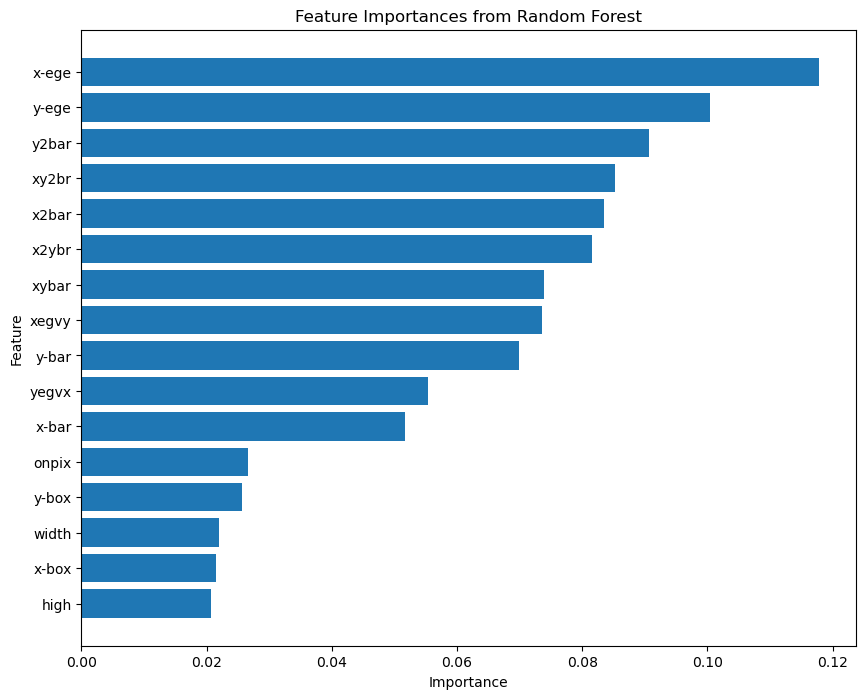

In [44]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
import matplotlib.pyplot as plt

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # To have the most important feature on top
plt.show()

In [21]:
# Create DOT data
string_numbers = [str(i) for i in range(26)]
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=string_numbers, filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Resize the graph
graph.set_size('"12,12!"')

# Show graph
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.139952 to fit



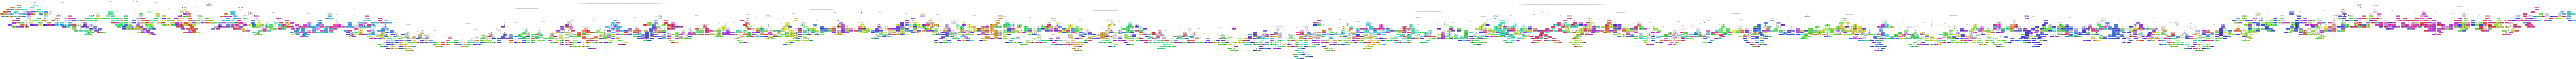

In [20]:
# Create DOT data
string_numbers = [str(i) for i in range(26)]
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=string_numbers, filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())